<a href="https://colab.research.google.com/github/Zhansaaya/dlya/blob/master/DINO_OR_DRAGON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Новый раздел

Found 1594 files belonging to 2 classes.
Found 394 files belonging to 2 classes.


Epoch 1/5
50/50 [==============================] - 207s 3s/step - loss: 0.4296 - accuracy: 0.8312 - val_loss: 1.4918 - val_accuracy: 0.6599
Epoch 2/5
50/50 [==============================] - 187s 4s/step - loss: 0.1669 - accuracy: 0.9454 - val_loss: 1.2282 - val_accuracy: 0.6980
Epoch 3/5
50/50 [==============================] - 162s 3s/step - loss: 0.1187 - accuracy: 0.9592 - val_loss: 3.0445 - val_accuracy: 0.5990
Epoch 4/5
50/50 [==============================] - 173s 3s/step - loss: 0.1340 - accuracy: 0.9536 - val_loss: 0.4701 - val_accuracy: 0.9086
Epoch 5/5
50/50 [==============================] - 165s 3s/step - loss: 0.1191 - accuracy: 0.9580 - val_loss: 0.3930 - val_accuracy: 0.9289


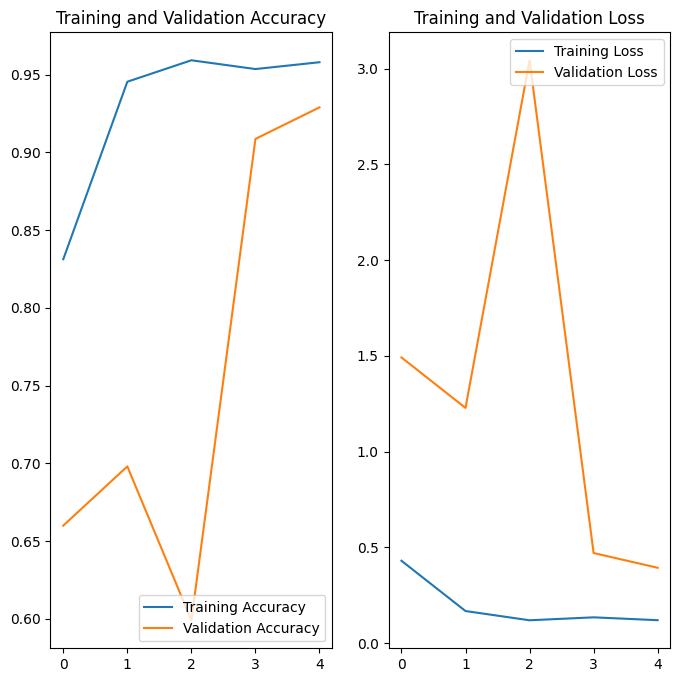

1/1 [==============================] - 1s 1s/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


This image most likely belongs to dragon.
Dominant colors (RGB): [[121 133 155]
 [ 59  75 103]
 [198 198 200]]


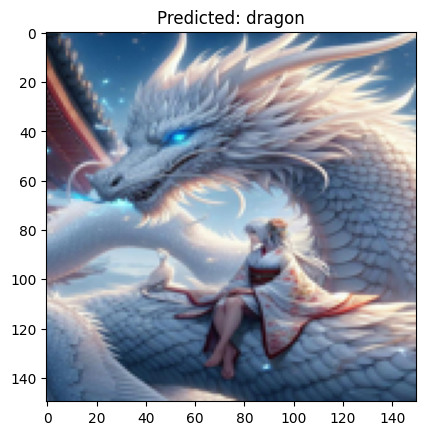

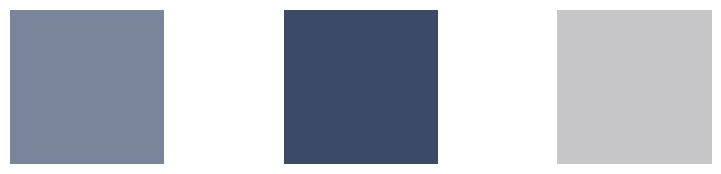

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
from sklearn.cluster import KMeans

def load_image_from_url(url):
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    image = image.resize((150, 150))
    return image

def preprocess_image(image):
    image_array = tf.keras.preprocessing.image.img_to_array(image)
    image_array = tf.expand_dims(image_array, 0)
    image_array /= 255.0
    return image_array

def extract_colors(image, num_colors=3):
    image = image.resize((64, 64))
    data = np.array(image)
    data = data.reshape(-1, 3)
    kmeans = KMeans(n_clusters=num_colors)
    kmeans.fit(data)
    colors = kmeans.cluster_centers_
    return colors.astype(int)

def predict_image(model, image_array):
    predictions = model.predict(image_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    return predicted_class

# Загрузка данных
image_size = (150, 150)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/dinoordragon/train",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/dinoordragon/test",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True
)

data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')


for layer in base_model.layers[-20:]:
    if not isinstance(layer, layers.BatchNormalization):
        layer.trainable = True

model = tf.keras.Sequential([
    data_augmentation,
    base_model,
    layers.Conv2D(64, 3, activation='relu', padding='same'),
    layers.Conv2D(64, 3, activation='relu', padding='same'),
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax'),
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

epochs = 5
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



url = "https://images.ficbook.net/fanfic-covers/d_OGQMnk3hJKWxFdJ8Gnae5NpPDprZAvDc.jpg"
image = load_image_from_url(url)
image_array = preprocess_image(image)
predicted_class = predict_image(model, image_array)
class_names = ["dino", "dragon"]
colors = extract_colors(image)

print(f"This image most likely belongs to {class_names[predicted_class]}.")
print(f"Dominant colors (RGB): {colors}")

plt.imshow(image)
plt.title(f"Predicted: {class_names[predicted_class]}")
plt.show()

plt.figure(figsize=(10, 2))
for i, color in enumerate(colors):
    plt.subplot(1, len(colors), i+1)
    plt.axis('off')
    plt.imshow([[color/255.0]])
plt.show()


Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


Epoch 1/10
80/80 [==============================] - 44s 508ms/step - loss: 0.1884 - accuracy: 0.9291 - val_loss: 0.0484 - val_accuracy: 0.9873
Epoch 2/10
80/80 [==============================] - 38s 477ms/step - loss: 0.0598 - accuracy: 0.9812 - val_loss: 0.0294 - val_accuracy: 0.9898
Epoch 3/10
80/80 [==============================] - 41s 508ms/step - loss: 0.0346 - accuracy: 0.9875 - val_loss: 0.0200 - val_accuracy: 0.9898
Epoch 4/10
80/80 [==============================] - 40s 504ms/step - loss: 0.0198 - accuracy: 0.9937 - val_loss: 0.0358 - val_accuracy: 0.9822
Epoch 5/10
80/80 [==============================] - 42s 523ms/step - loss: 0.0195 - accuracy: 0.9931 - val_loss: 0.0196 - val_accuracy: 0.9898
Epoch 6/10
80/80 [==============================] - 40s 494ms/step - loss: 0.0193 - accuracy: 0.9931 - val_loss: 0.0189 - val_accuracy: 0.9898
Epoch 7/10
80/80 [==============================] - 38s 474ms/step - loss: 0.0178 - accuracy: 0.9962 - val_loss: 0.0195 - val_accuracy: 0.9924

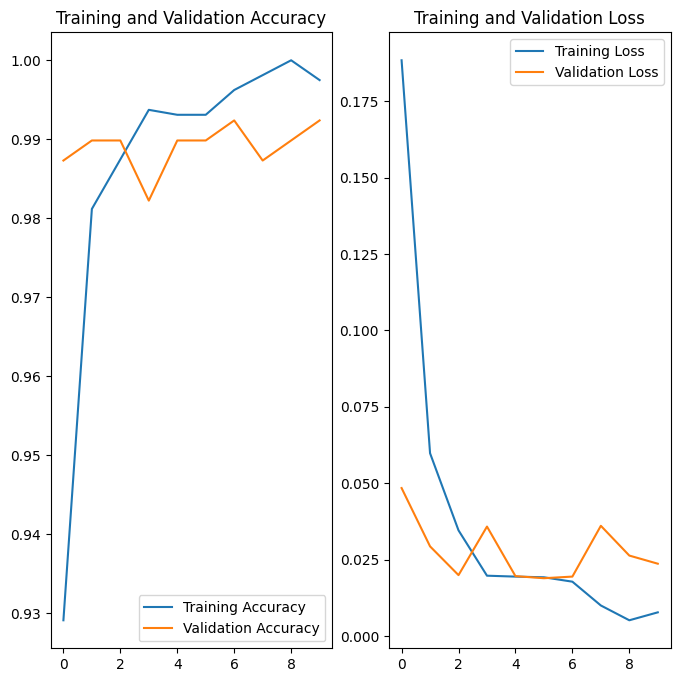

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
from sklearn.cluster import KMeans

# Функции для работы с изображениями
def load_image_from_url(url):
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    image = image.resize((150, 150))
    return image

def preprocess_image(image):
    image_array = tf.keras.preprocessing.image.img_to_array(image)
    image_array = tf.expand_dims(image_array, 0)
    image_array /= 255.0
    return image_array

def extract_colors(image, num_colors=3):
    image = image.resize((64, 64))
    data = np.array(image)
    data = data.reshape(-1, 3)
    kmeans = KMeans(n_clusters=num_colors)
    kmeans.fit(data)
    colors = kmeans.cluster_centers_
    return colors.astype(int)

def predict_image(model, image_array):
    predictions = model.predict(image_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    return predicted_class

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/dinoordragon/train',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/dinoordragon/test',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

model.summary()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Found 1594 files belonging to 2 classes.
Found 394 files belonging to 2 classes.


Epoch 1/20
50/50 [==============================] - 189s 3s/step - loss: 0.4189 - accuracy: 0.8212 - val_loss: 0.9429 - val_accuracy: 0.7234
Epoch 2/20
50/50 [==============================] - 164s 3s/step - loss: 0.1619 - accuracy: 0.9410 - val_loss: 0.2808 - val_accuracy: 0.9010
Epoch 3/20
50/50 [==============================] - 163s 3s/step - loss: 0.1315 - accuracy: 0.9548 - val_loss: 1.3089 - val_accuracy: 0.7868
Epoch 4/20
50/50 [==============================] - 165s 3s/step - loss: 0.1415 - accuracy: 0.9611 - val_loss: 0.5281 - val_accuracy: 0.9188
Epoch 5/20
50/50 [==============================] - 160s 3s/step - loss: 0.1237 - accuracy: 0.9561 - val_loss: 0.8187 - val_accuracy: 0.8832
Epoch 6/20
50/50 [==============================] - 164s 3s/step - loss: 0.0868 - accuracy: 0.9686 - val_loss: 0.2324 - val_accuracy: 0.9670
Epoch 7/20
50/50 [==============================] - 161s 3s/step - loss: 0.0804 - accuracy: 0.9768 - val_loss: 0.3503 - val_accuracy: 0.9365
Epoch 8/20
50

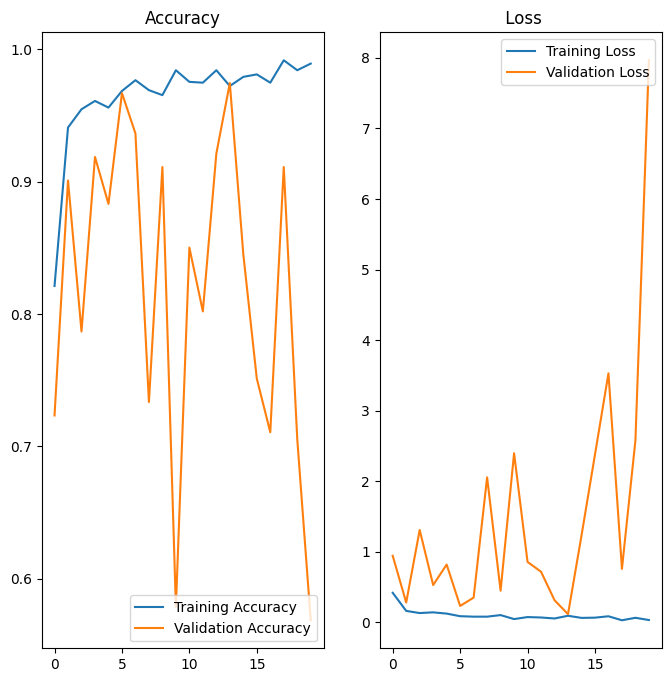

Median training accuracy: 0.9749059081077576
Standard deviation of training loss: 0.0806126335911656
1/1 [==============================] - 1s 1s/step
This image dino.
Dominant colors (RGB): [[140 188  94]
 [247 247 247]
 [ 96 126  70]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


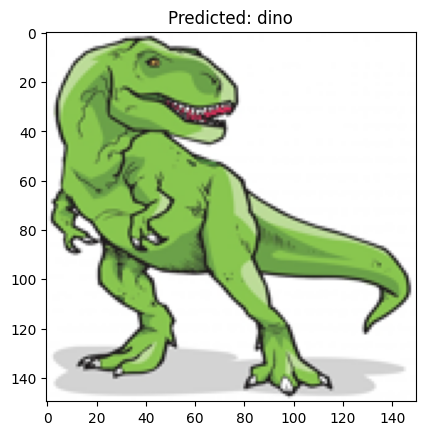

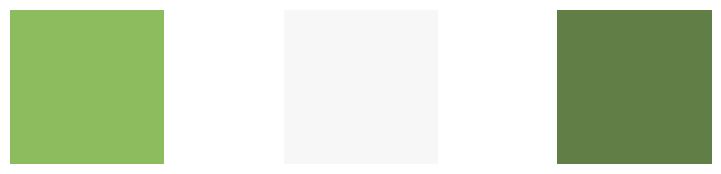

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
from sklearn.cluster import KMeans

def load_image_from_url(url):
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    image = image.resize((150, 150))
    return image

def preprocess_image(image):
    image_array = tf.keras.preprocessing.image.img_to_array(image)
    image_array = tf.expand_dims(image_array, 0)
    image_array /= 255.0
    return image_array

def extract_colors(image, num_colors=3):
    image = image.resize((64, 64))
    data = np.array(image)
    data = data.reshape(-1, 3)
    kmeans = KMeans(n_clusters=num_colors)
    kmeans.fit(data)
    colors = kmeans.cluster_centers_
    return colors.astype(int)

def predict_image(model, image_array):
    predictions = model.predict(image_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    return predicted_class

image_size = (150, 150)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/dinoordragon/train",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/dinoordragon/test",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True
)

data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')

for layer in base_model.layers[-20:]:
    if not isinstance(layer, layers.BatchNormalization):
        layer.trainable = True

model = tf.keras.Sequential([
    data_augmentation,
    base_model,
    layers.Conv2D(64, 3, activation='relu', padding='same'),
    layers.Conv2D(64, 3, activation='relu', padding='same'),
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax'),
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

epochs = 20
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title(' Loss')
plt.show()



acc = history.history['accuracy']
loss = history.history['loss']

# медиану точности обучения
median_accuracy = np.median(acc)
print(f"Median training accuracy: {median_accuracy}")

#  стандартное отклонение потерь в процессе обучения
std_loss = np.std(loss)
print(f"Standard deviation of training loss: {std_loss}")



url = "https://img.freepik.com/premium-vector/tyrannosaurus-rex-dinosaur_131928-28.jpg"
image = load_image_from_url(url)
image_array = preprocess_image(image)
predicted_class = predict_image(model, image_array)
class_names = ["dino", "dragon"]
colors = extract_colors(image)

print(f"This image {class_names[predicted_class]}.")
print(f"Dominant colors (RGB): {colors}")

plt.imshow(image)
plt.title(f"Predicted: {class_names[predicted_class]}")
plt.show()

plt.figure(figsize=(10, 2))
for i, color in enumerate(colors):
    plt.subplot(1, len(colors), i+1)
    plt.axis('off')
    plt.imshow([[color/255.0]])
plt.show()


Found 1594 files belonging to 2 classes.
Found 394 files belonging to 2 classes.


Epoch 1/5
50/50 [==============================] - 230s 4s/step - loss: 0.3977 - accuracy: 0.8312 - val_loss: 0.8705 - val_accuracy: 0.7766
Epoch 2/5
50/50 [==============================] - 164s 3s/step - loss: 0.1573 - accuracy: 0.9454 - val_loss: 5.4919 - val_accuracy: 0.5381
Epoch 3/5
50/50 [==============================] - 159s 3s/step - loss: 0.1656 - accuracy: 0.9486 - val_loss: 0.8171 - val_accuracy: 0.8782
Epoch 4/5
50/50 [==============================] - 164s 3s/step - loss: 0.1248 - accuracy: 0.9592 - val_loss: 0.1704 - val_accuracy: 0.9670
Epoch 5/5
50/50 [==============================] - 162s 3s/step - loss: 0.1193 - accuracy: 0.9630 - val_loss: 0.9399 - val_accuracy: 0.8604


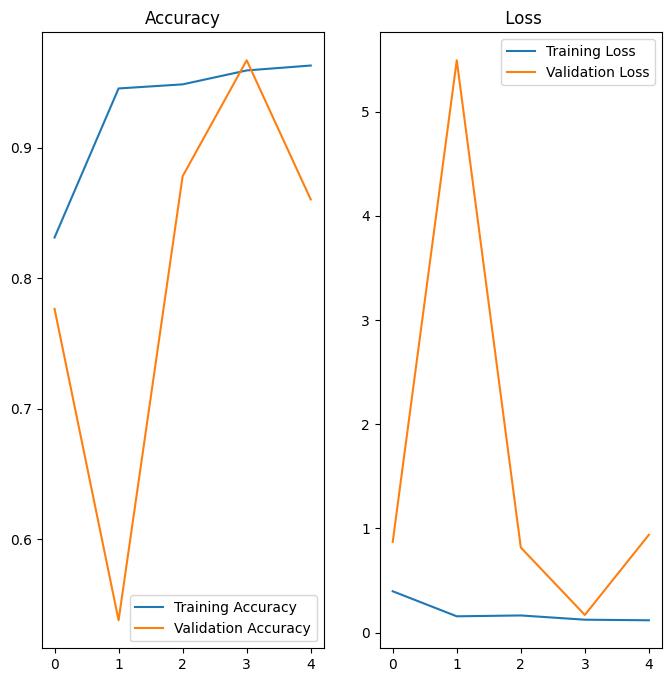

1/1 [==============================] - 1s 1s/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


This image dino.
Dominant colors (RGB): [[193 222 234]
 [ 88  75  69]
 [142 132 122]]


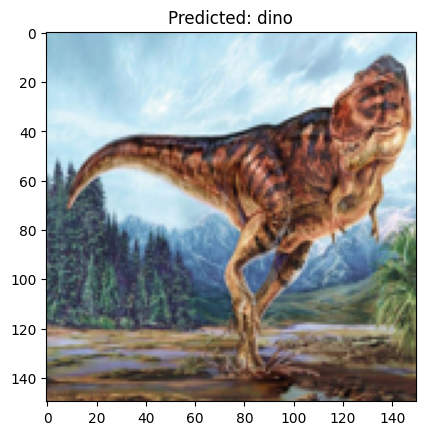

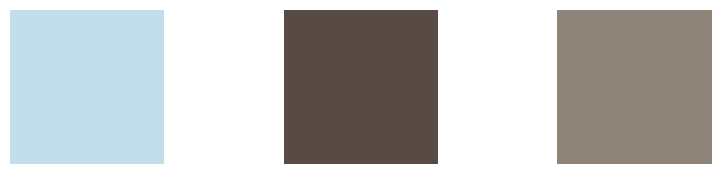

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
from sklearn.cluster import KMeans

def load_image_from_url(url):
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    image = image.resize((150, 150))
    return image

def preprocess_image(image):
    image_array = tf.keras.preprocessing.image.img_to_array(image)
    image_array = tf.expand_dims(image_array, 0)
    image_array /= 255.0
    return image_array

def extract_colors(image, num_colors=3):
    image = image.resize((64, 64))
    data = np.array(image)
    data = data.reshape(-1, 3)
    kmeans = KMeans(n_clusters=num_colors)
    kmeans.fit(data)
    colors = kmeans.cluster_centers_
    return colors.astype(int)

def predict_image(model, image_array):
    predictions = model.predict(image_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    return predicted_class

image_size = (150, 150)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/dinoordragon/train",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/dinoordragon/test",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True
)

data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')

for layer in base_model.layers[-20:]:
    if not isinstance(layer, layers.BatchNormalization):
        layer.trainable = True

model = tf.keras.Sequential([
    data_augmentation,
    base_model,
    layers.Conv2D(64, 3, activation='relu', padding='same'),
    layers.Conv2D(64, 3, activation='relu', padding='same'),
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax'),
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

epochs = 5
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title(' Loss')
plt.show()

url = "https://kuz-news.ru/wp-content/uploads/2023/08/%D0%B4%D0%B8%D0%BD%D0%BE%D0%B7%D0%B0%D0%B2%D1%80%D1%8B-%D0%B2-%D0%BA%D1%83%D0%B7%D0%B1%D0%B0%D1%81%D1%81%D0%B5.jpg"
image = load_image_from_url(url)
image_array = preprocess_image(image)
predicted_class = predict_image(model, image_array)
class_names = ["dino", "dragon"]
colors = extract_colors(image)

print(f"This image {class_names[predicted_class]}.")
print(f"Dominant colors (RGB): {colors}")

plt.imshow(image)
plt.title(f"Predicted: {class_names[predicted_class]}")
plt.show()

plt.figure(figsize=(10, 2))
for i, color in enumerate(colors):
    plt.subplot(1, len(colors), i+1)
    plt.axis('off')
    plt.imshow([[color/255.0]])
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')